In [3]:
##Importing the required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (9,5)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
##Reading the data
df = pd.read_csv("covid19_tweets.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [6]:
##Drop of useless columns
df1 = df.copy()
df1.drop(['source'],axis=1, inplace=True)

In [7]:
df1.is_retweet.value_counts()


False    179108
Name: is_retweet, dtype: int64

In [8]:
df1.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
is_retweet              0
dtype: int64

In [9]:
df2 = df1.dropna()

In [10]:
df2.isnull().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
is_retweet          0
dtype: int64

In [11]:
df2.shape

(99159, 12)

In [12]:
df2.describe

<bound method NDFrame.describe of                      user_name         user_location  \
2              Time4fisticuffs      Pewee Valley, KY   
3                  ethel mertz  Stuck in the Middle    
4                     DIPR-J&K     Jammu and Kashmir   
5             🎹 Franz Schubert           Новоро́ссия   
6                 hr bartender       Gainesville, FL   
...                        ...                   ...   
179101       New Jersey Herald            Newton, NJ   
179102                    Pris                  T.O.   
179103  AJIMATI AbdulRahman O.       Ilorin, Nigeria   
179104                   Jason               Ontario   
179106           Gary DelPonte         New York City   

                                         user_description  \
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   
4       🖊️Official Twitter handle of Department of Inf...   
5       🎼  #Новоро́ссия #Novorossiya #оставайсядо

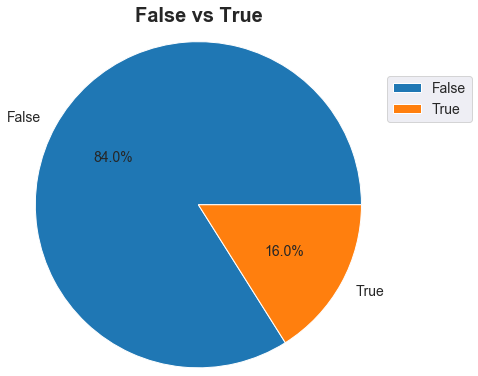

In [13]:
##Visualization
content = df2.user_verified.value_counts()
plt.pie(content.values, labels=content.index, autopct='%1.1f%%', radius=1.5)
plt.legend(content.index, loc="upper center", bbox_to_anchor=(1.35, 1),ncol=1)
plt.title('False vs True',y=1.15, fontsize=20,weight='bold')
plt.show()

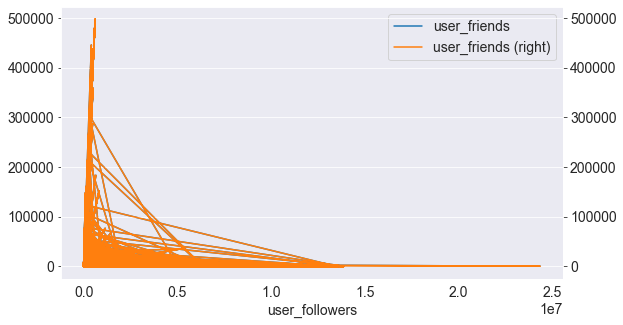

In [14]:
fig, ax = plt.subplots() # Create the figure and axes object
# Plot the first x and y axes:
df2.plot(x = 'user_followers', y = 'user_friends', ax = ax) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
df2.plot(x = 'user_followers', y = 'user_friends', ax = ax, secondary_y = True) 

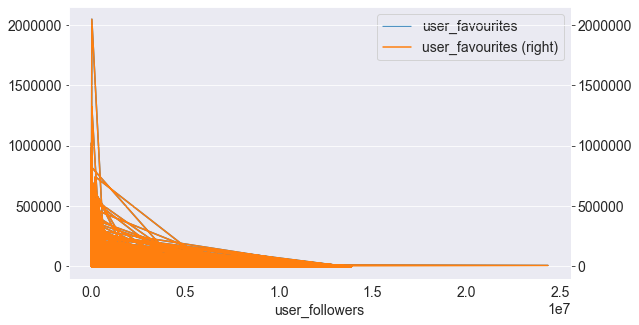

In [15]:
fig, ax = plt.subplots() # Create the figure and axes object
# Plot the first x and y axes:
df2.plot(x = 'user_followers', y = 'user_favourites', ax = ax) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
df2.plot(x = 'user_followers', y = 'user_favourites', ax = ax, secondary_y = True)

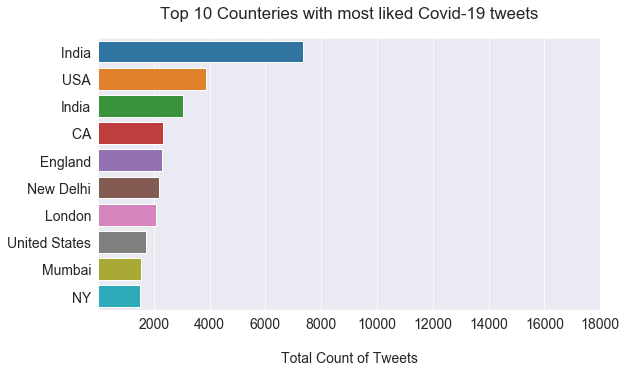

In [17]:
location_count = pd.Series(df2.user_location.str.split(',').sum()).value_counts()
location = location_count.head(10).index
fav_count = location_count.head(10).values
sns.barplot(y=location,x=fav_count);
plt.title("Top 10 Counteries with most liked Covid-19 tweets",y=1.05);
plt.xlabel('Total Count of Tweets', labelpad=20);
plt.xticks(range(2000,20000,2000));